In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
import datetime as dt
import matplotlib as mpl
import geopandas
import seaborn as sns
import patchworklib as pw

## Plotting parameters"
mpl.rcParams['pdf.fonttype'] = 42

## Cubic feet to cubic meters conversion factor
cfs_2_cms = 0.0283168466

<Figure size 100x100 with 0 Axes>

## Read in data and plot

In [5]:
output  = pd.read_csv("../data/streamflowStats_NWM3.csv")

In [6]:
df = pd.read_csv("../data/pnwNP_StatsLocations_HydroClass.csv")
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.dec_long_va,df.dec_lat_va)).set_crs('epsg:4269')
df = df[["gage","geometry","HydroLandClass"]]
df = pd.concat([df, output], join="outer",axis=1)
df = df.loc[:,~df.columns.duplicated()]

In [7]:
## Just get gages that were in the KGE analysis. That is, just gages that had KGE values
kgeGages = pd.read_csv("../data/KGE_gages.csv")
df = df[df["gage"].isin(kgeGages['gage'])].reset_index(drop=True)

## Metric plotting function

In [40]:
def plotMetric(stat):
    import warnings
    warnings.filterwarnings("ignore")

    # fig, (ax2,g) = plt.subplots(1, 2,figsize=(20,8))
    plt.figure(figsize=(6,6))
    plt.rcParams.update({'font.size': 12})
    
    
    
    ##############################################
    ## NWIS Plot
    ##############################################

    to_plot = df[['NWIS_'+stat,'HydroLandClass']].melt(id_vars=['HydroLandClass'])

    my_order = ["very_wet",
                "wet",
                "moist",
                "dry",
                "semi_arid",
                "arid"]

    pal = {'very_wet': '#728C48',
           'wet': '#96B06A',
           'moist': '#C6BD6C',
           'dry': '#FFCD93',
           'semi_arid': '#EC975F' ,
           'arid': '#B0632F'}
    plt.figure(figsize=(4,4))
    ax1 = sns.boxplot(
        data=to_plot, 
                     x="HydroLandClass", 
                     y="value",
                     hue="HydroLandClass",
                     showfliers=False,
                     palette = pal,
                    order = my_order)
    
    
    ax1.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])
    # ax1.set_ylim([10e-5,10e2])
    ax1.set(ylabel=str(stat)+ "Observed")
    ax1.set(xlabel="Hydrologic Landscape")
    # ax1.set(yscale = 'log')
    ax1.grid('on', which='major', axis='y')
    plt.savefig("../docs/NWIS"+stat+"_boxplot.pdf")
    # plt.savefig("../docs/delete/NWIS"+stat+"_boxplot.png",dpi=600)


    ##############################################
    ## Subplots
    ##############################################
    to_plot = df[["NWM2d1_"+stat,"NWM3"+stat,"VIC_"+stat,"PRMS_"+stat,'HydroLandClass']].melt(id_vars=['HydroLandClass'])

    my_order = ["very_wet",
                "wet",
                "moist",
                "dry",
                "semi_arid",
                "arid"]
    
    pal = {'very_wet': '#728C48',
           'wet': '#96B06A',
           'moist': '#C6BD6C',
           'dry': '#FFCD93',
           'semi_arid': '#EC975F' ,
           'arid': '#B0632F'}
    
    sns.set_theme(rc={'figure.figsize':(4,4)},style="white")
    
    g = sns.catplot(
        data=to_plot, x='HydroLandClass', y='value',
        col='variable', col_wrap = 2, kind='box',
        height = 2, aspect = 1,
        order= my_order,hue = "HydroLandClass", palette=pal,
        col_order=["NWM3"+stat,"NWM2d1_"+stat,"VIC_"+stat,"PRMS_"+stat],**{"showfliers":False}
    )
    
    g.set_xticklabels(["V","W","M","D","S","A"])
    g.set(xlabel=None)
    
    axes = g.axes.flatten()
    ## Set titles
    axes[0].set_title("NWM 3.0")
    axes[1].set_title("NWM 2.1")
    axes[2].set_title("VIC")
    axes[3].set_title("PRMS")
    
    
    # ## Set y label
    axes[0].set_ylabel(stat)
    axes[2].set_ylabel(None)
    
    plt.subplots_adjust(wspace = 0.05,hspace=0.25)
    
    plt.savefig("../docs/"+stat+"_boxplot.pdf")
    # plt.savefig("../docs/delete/"+stat+"_boxplot.png",dpi=600)

## Plots of duration metrics

<Figure size 600x600 with 0 Axes>

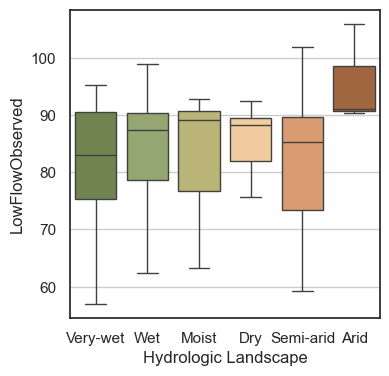

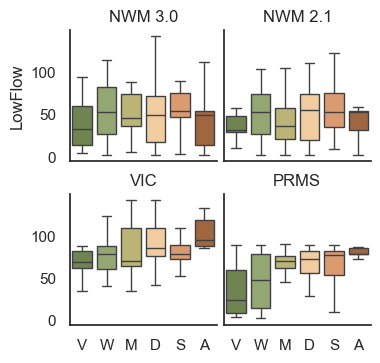

<Figure size 600x600 with 0 Axes>

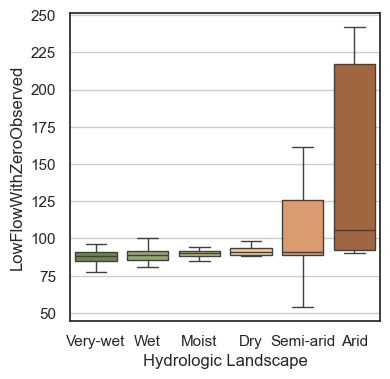

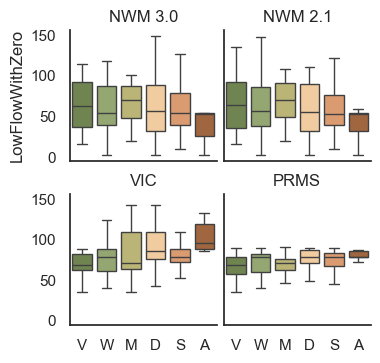

<Figure size 600x600 with 0 Axes>

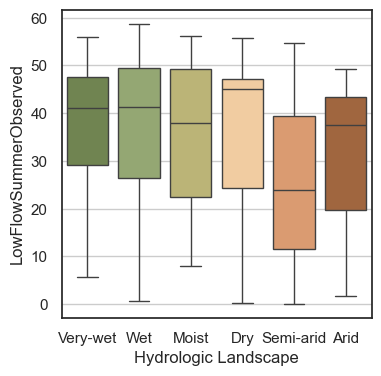

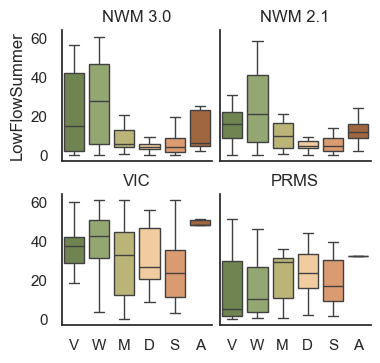

<Figure size 600x600 with 0 Axes>

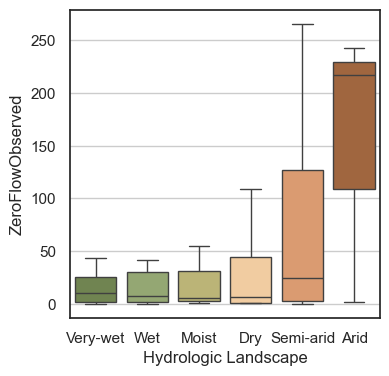

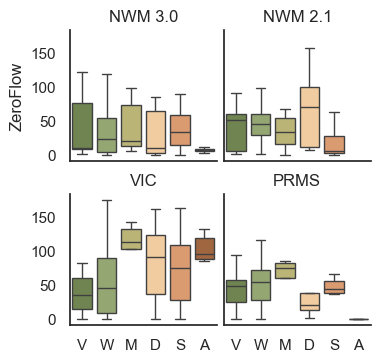

In [41]:
plotMetric('LowFlow')
plotMetric('LowFlowWithZero')
plotMetric('LowFlowSummer')
plotMetric('ZeroFlow')

## Metric plotting function

In [46]:
def plotMetric(stat):
    import warnings
    warnings.filterwarnings("ignore")

    # fig, (ax2,g) = plt.subplots(1, 2,figsize=(20,8))
    plt.figure(figsize=(6,6))
    plt.rcParams.update({'font.size': 12})
    
    
    
    ##############################################
    ## NWIS Plot
    ##############################################

    to_plot = df[['NWIS_'+stat,'HydroLandClass']].melt(id_vars=['HydroLandClass'])

    my_order = ["very_wet",
                "wet",
                "moist",
                "dry",
                "semi_arid",
                "arid"]

    pal = {'very_wet': '#728C48',
           'wet': '#96B06A',
           'moist': '#C6BD6C',
           'dry': '#FFCD93',
           'semi_arid': '#EC975F' ,
           'arid': '#B0632F'}
    plt.figure(figsize=(4,4))
    ax1 = sns.boxplot(
        data=to_plot, 
                     x="HydroLandClass", 
                     y="value",
                     hue="HydroLandClass",
                     showfliers=False,
                     palette = pal,
                    order = my_order)
    
    
    ax1.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])
    # ax1.set_ylim([10e-5,10e2])
    ax1.set(ylabel=str(stat)+ "Observed")
    ax1.set(xlabel="Hydrologic Landscape")
    ax1.set(yscale = 'log')
    ax1.grid('on', which='major', axis='y')
    # plt.savefig("../docs/NWIS"+stat+"_boxplot.pdf")
    # plt.savefig("../docs/delete/NWIS"+stat+"_boxplot.png",dpi=600)


    ##############################################
    ## Subplots
    ##############################################
    to_plot = df[["NWM2d1_"+stat,"NWM3"+stat,"VIC_"+stat,"PRMS_"+stat,'HydroLandClass']].melt(id_vars=['HydroLandClass'])

    my_order = ["very_wet",
                "wet",
                "moist",
                "dry",
                "semi_arid",
                "arid"]
    
    pal = {'very_wet': '#728C48',
           'wet': '#96B06A',
           'moist': '#C6BD6C',
           'dry': '#FFCD93',
           'semi_arid': '#EC975F' ,
           'arid': '#B0632F'}
    
    sns.set_theme(rc={'figure.figsize':(4,4)},style="white")
    
    g = sns.catplot(
        data=to_plot, x='HydroLandClass', y='value',
        col='variable', col_wrap = 2, kind='box',
        height = 2, aspect = 1,
        order= my_order,hue = "HydroLandClass", palette=pal,
        col_order=["NWM3"+stat,"NWM2d1_"+stat,"VIC_"+stat,"PRMS_"+stat],**{"showfliers":False}
    )
    
    g.set_xticklabels(["V","W","M","D","S","A"])
    g.set(xlabel=None,yscale="log")
    
    axes = g.axes.flatten()
    ## Set titles
    axes[0].set_title("NWM 3.0")
    axes[1].set_title("NWM 2.1")
    axes[2].set_title("VIC")
    axes[3].set_title("PRMS")
    
    
    # ## Set y label
    axes[0].set_ylabel(stat)
    axes[2].set_ylabel(None)
    
    plt.subplots_adjust(wspace = 0.05,hspace=0.25)
    
    # plt.savefig("../docs/"+stat+"_boxplot.pdf")
    # plt.savefig("../docs/delete/"+stat+"_boxplot.png",dpi=600)

<Figure size 600x600 with 0 Axes>

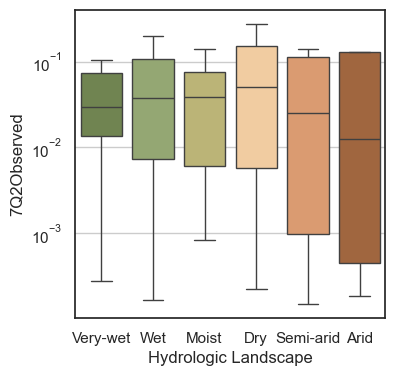

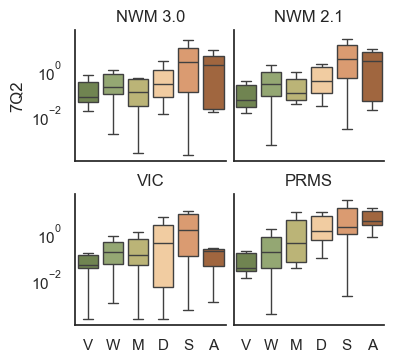

<Figure size 600x600 with 0 Axes>

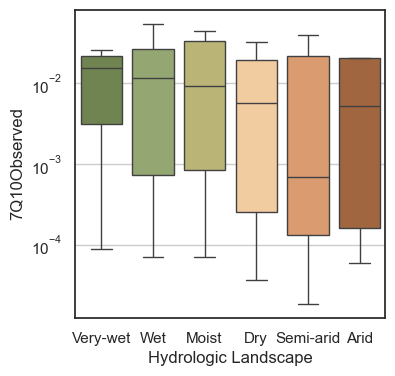

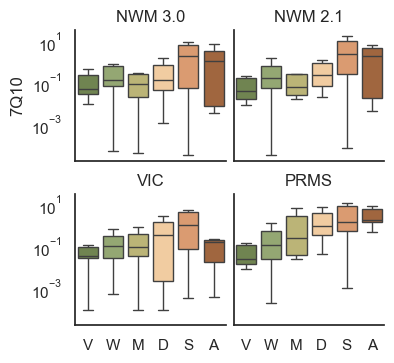

In [47]:
plotMetric('7Q2')
plotMetric('7Q10')

# Read in data and plot

In [5]:
def plotMetric(stat,ext):
    import warnings
    warnings.filterwarnings("ignore")

    fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,8))
    plt.rcParams.update({'font.size': 12})


    ##############################################
    ## Plot 1
    ##############################################
    columns = ["NWIS_"+stat,"NWM2d0_"+stat,"NWM2d1_"+stat,"NWM3"+stat,"VIC_"+stat,"PRMS_"+stat]

    tt = df[columns].melt()
    ax1 = sns.boxplot(ax = ax1,
                      data=tt, 
                     x="variable", 
                     y="value",
                     hue="variable",
                     showfliers=False,
                     # palette = ["grey","orangered", "dodgerblue","darksalmon","lightskyblue","green"],
                      palette = ["#95B0B4", ## NWIS
                                  "#79B5BD", ##NWM3.0
                                  "#AEA8BF", ##NWM2.1
                                  "#839FAF", ## NWM2.0
                                  "#836381", ## VIC
                                  "#87C4BF"], ## PRMS
                    order = columns)

    ax1.set_xticklabels(["NWIS","NWM 2.0","NWM 2.1","NWM 3.0","VIC","PRMS"])
    # ax1.set_ylim(ax1lim)
    ax1.set(ylabel=str(stat))
    ax1.set(xlabel="Model")
    ax1.set(title=ext+stat)
    ax1.grid('on', which='major', axis='y')
    
    
    
    
    ##############################################
    ## Plot 2
    ##############################################
    to_plot = df[['NWIS_'+stat,'HydroLandClass']].melt(id_vars=['HydroLandClass'])

    my_order = ["very_wet",
                "wet",
                "moist",
                "dry",
                "semi_arid",
                "arid"]

    pal = {'very_wet': '#728C48',
           'wet': '#96B06A',
           'moist': '#C6BD6C',
           'dry': '#FFCD93',
           'semi_arid': '#EC975F' ,
           'arid': '#B0632F'}

    ax2 = sns.boxplot(ax = ax2,
                      data=to_plot, 
                     x="HydroLandClass", 
                     y="value",
                     hue="HydroLandClass",
                     showfliers=False,
                     palette = pal,
                    order = my_order)
    
    
    ax2.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])
    # ax2.set_ylim(ax2lim)
    ax2.set(ylabel=str(stat)+ "Obs.")
    ax2.set(xlabel="Hydrologic Landscape")
    ax2.grid('on', which='major', axis='y')


    ##############################################
    ## Plot 3
    ##############################################
    to_plot = df[["NWIS_"+stat,"NWM2d0_"+stat,"NWM2d1_"+stat,"NWM3"+stat,"VIC_"+stat,"PRMS_"+stat,'HydroLandClass']].melt(id_vars=['HydroLandClass'])

    ax3 = sns.boxplot(ax = ax3,
                      data=to_plot, 
                     x="HydroLandClass", 
                     y="value",
                     hue="HydroLandClass",
                     showfliers=False,
                     palette = pal,
                    order = my_order)

    ax3.set_xticklabels(["Very-wet","Wet","Dry","Moist","Semi-arid","Arid"])
    # ax3.set_ylim(ax2lim)
    ax3.set(ylabel=str(stat)+"modeled")
    ax3.set(xlabel="Hydrologic Landscape")
    ax3.grid('on', which='major', axis='y')
    
    plt.savefig("../docs/delete/"+ext+"_"+stat+".png",dpi=600)


In [11]:
## Just get gages that were in the KGE analysis. That is, just gages that had KGE values
kgeGages = pd.read_csv("../data/KGE_gages.csv")
df = df[df["gage"].isin(kgeGages['gage'])].reset_index(drop=True)

## Plots of metrics

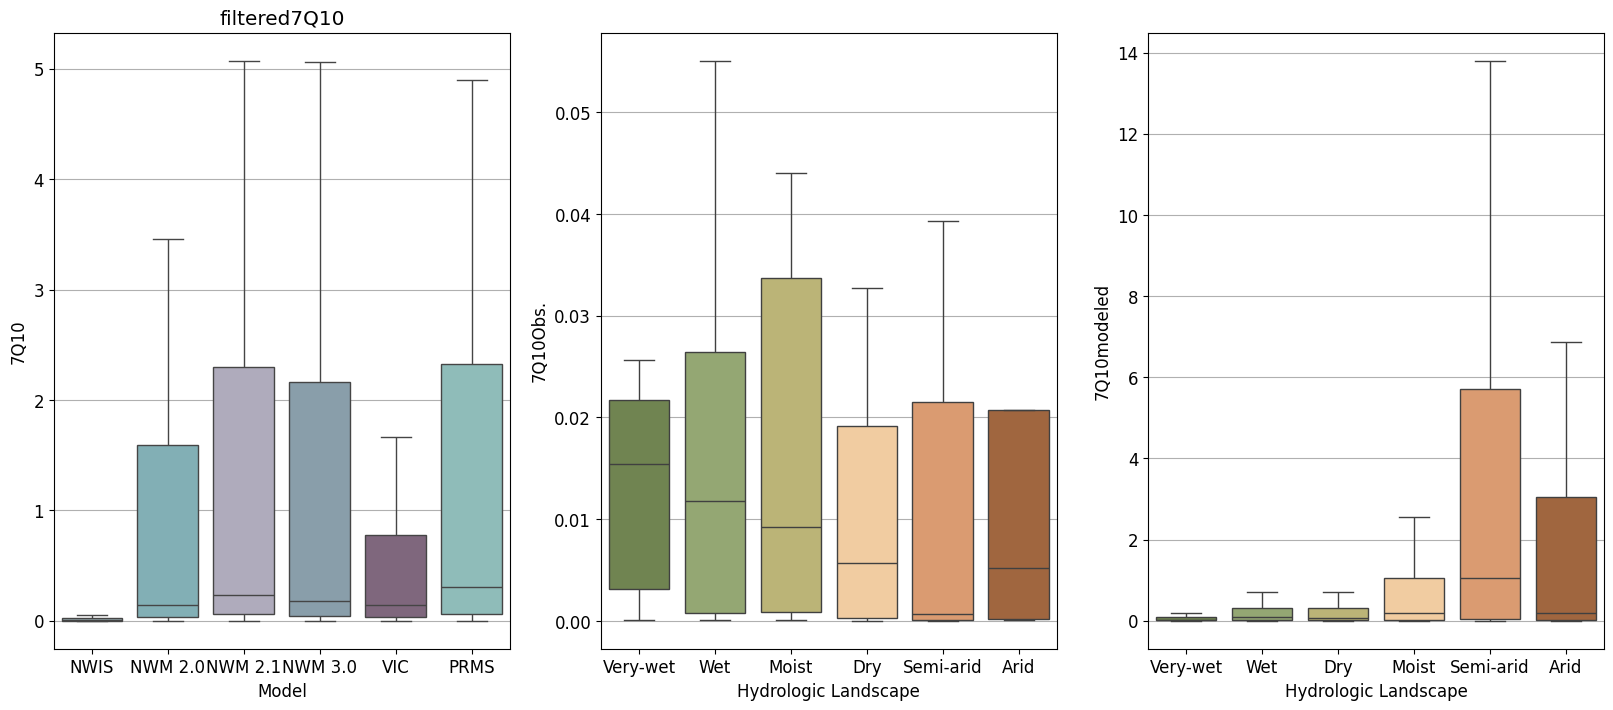

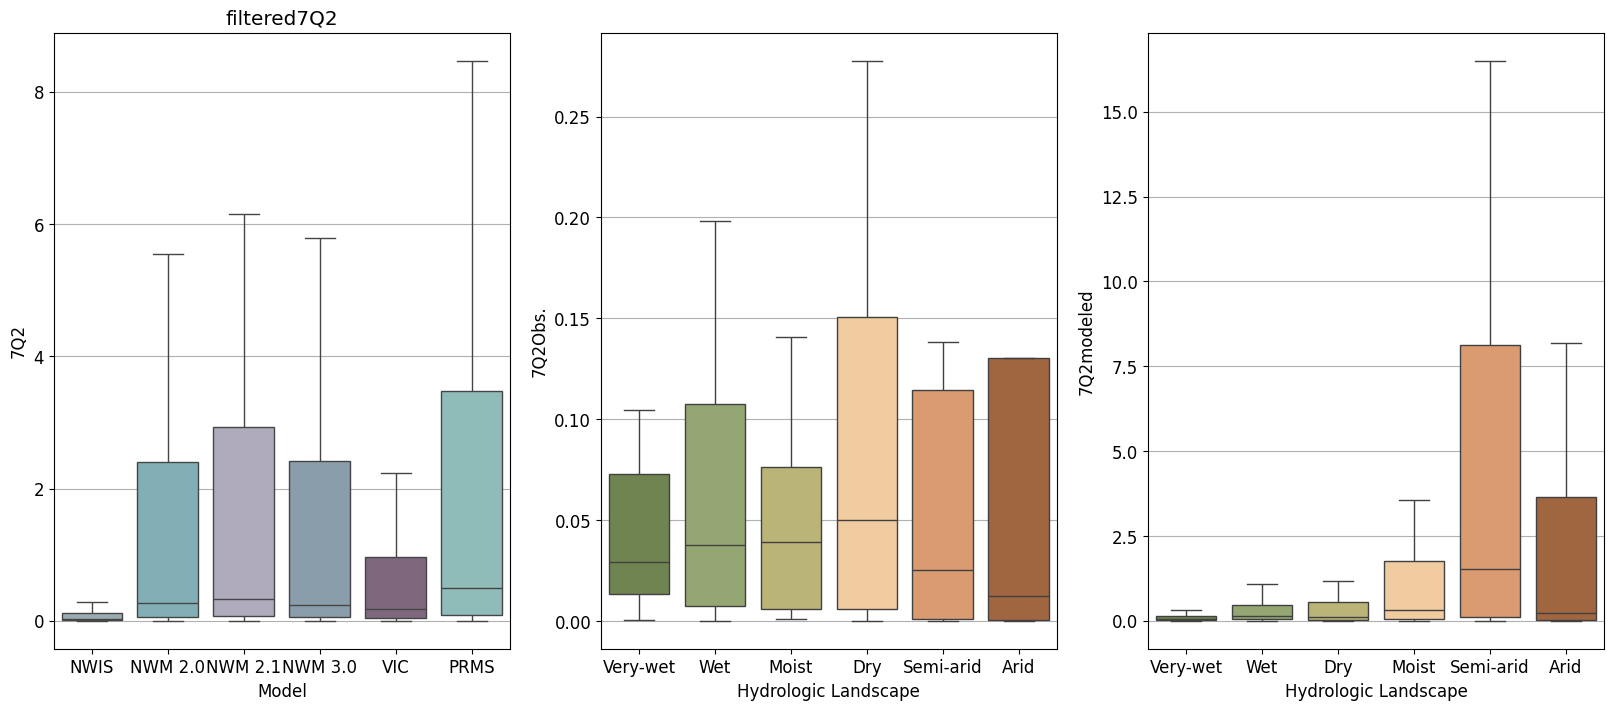

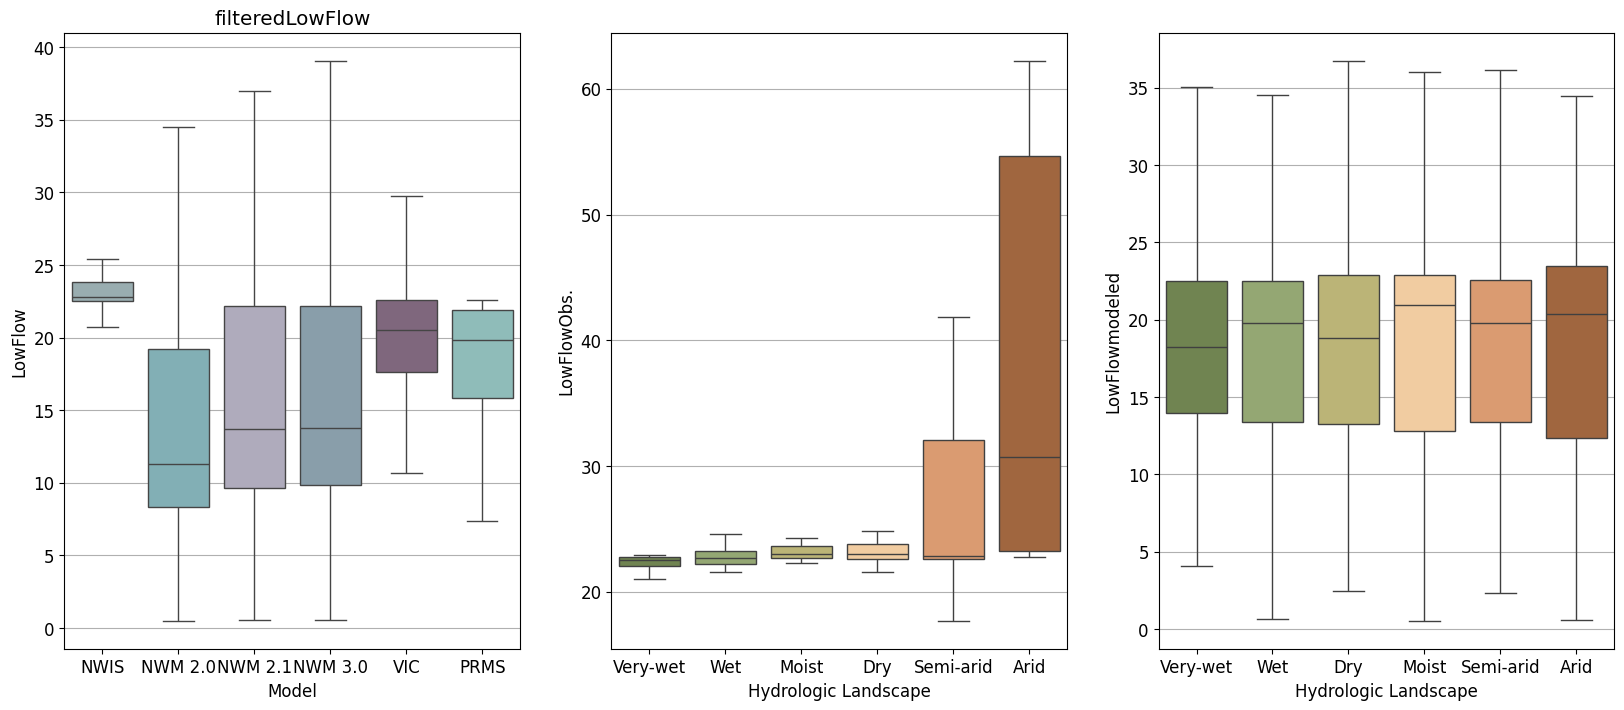

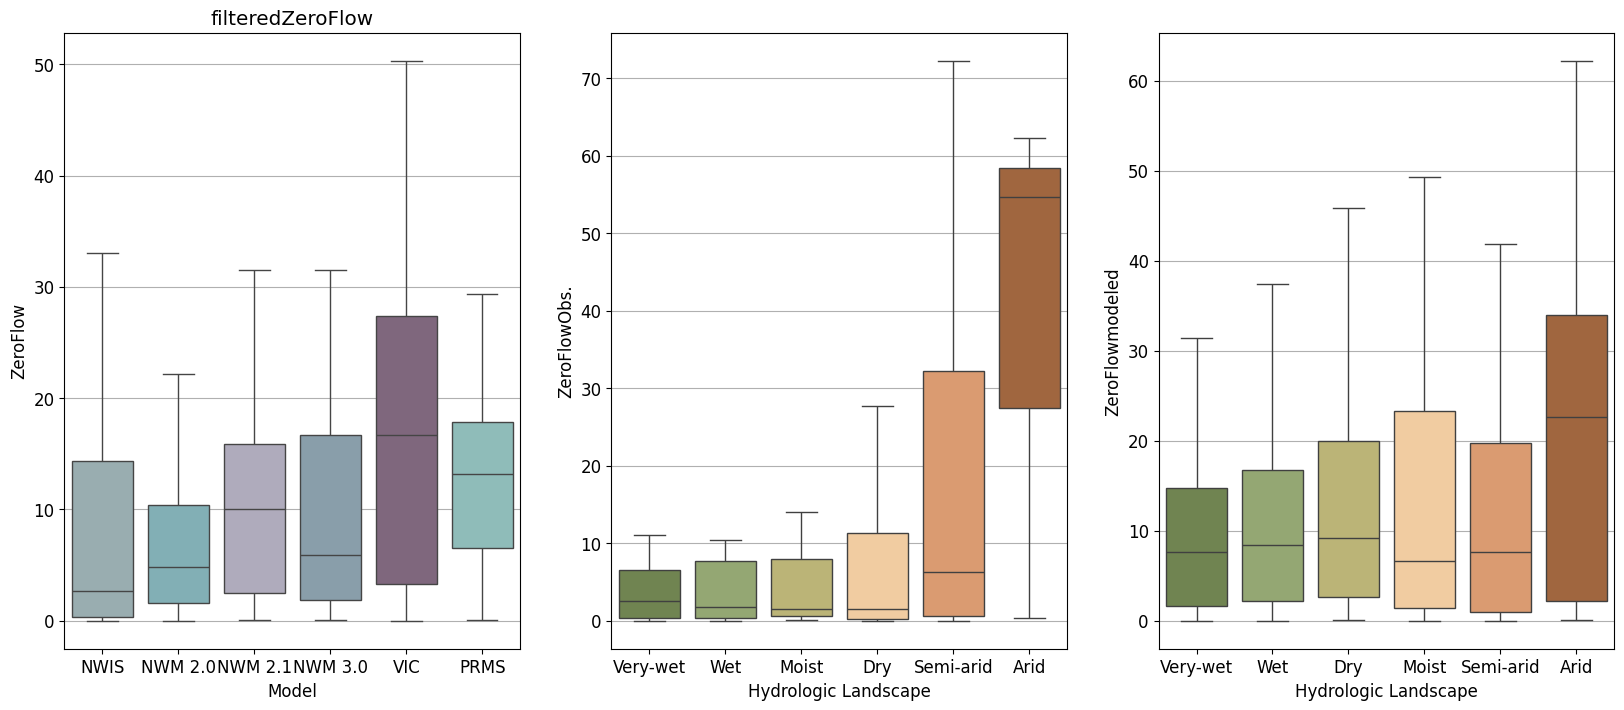

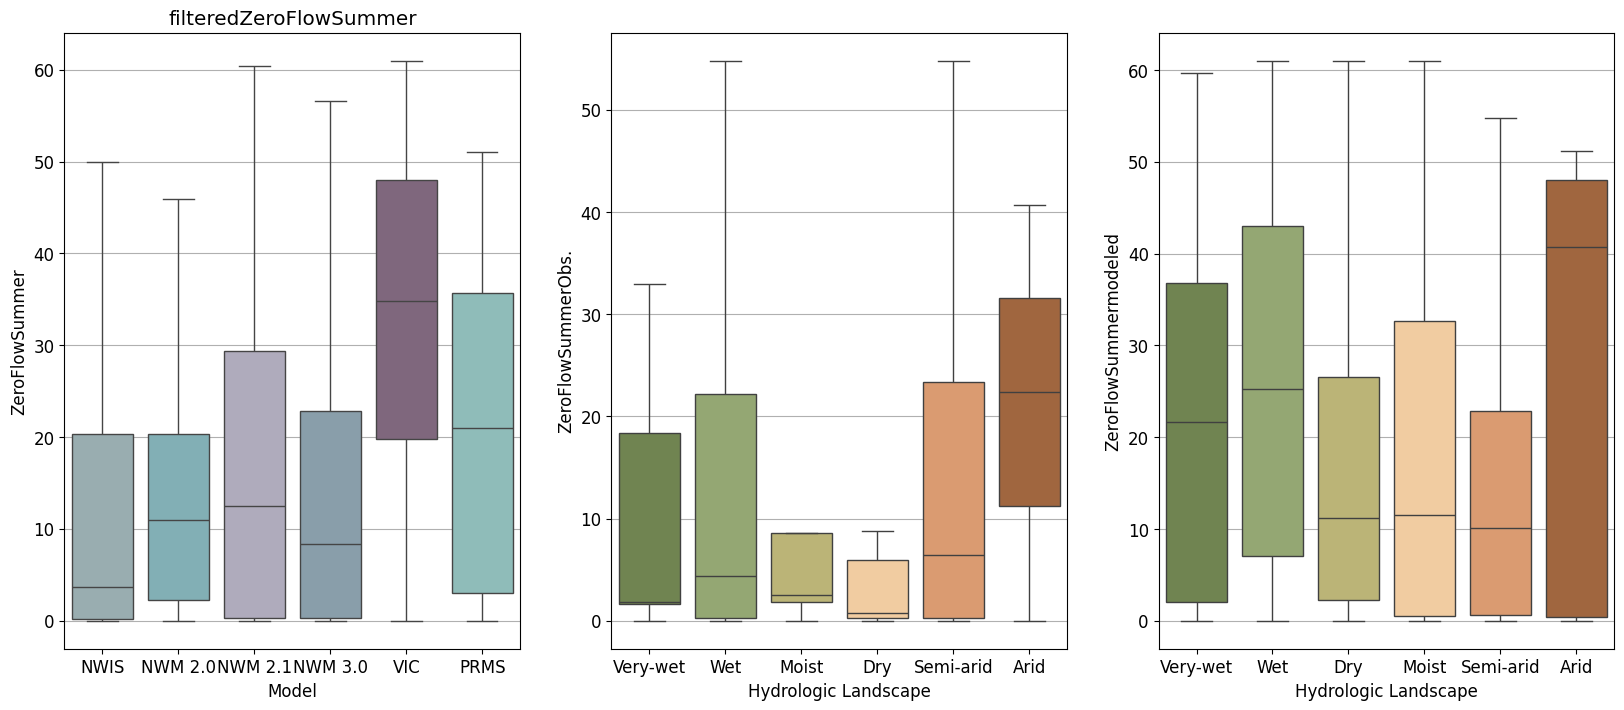

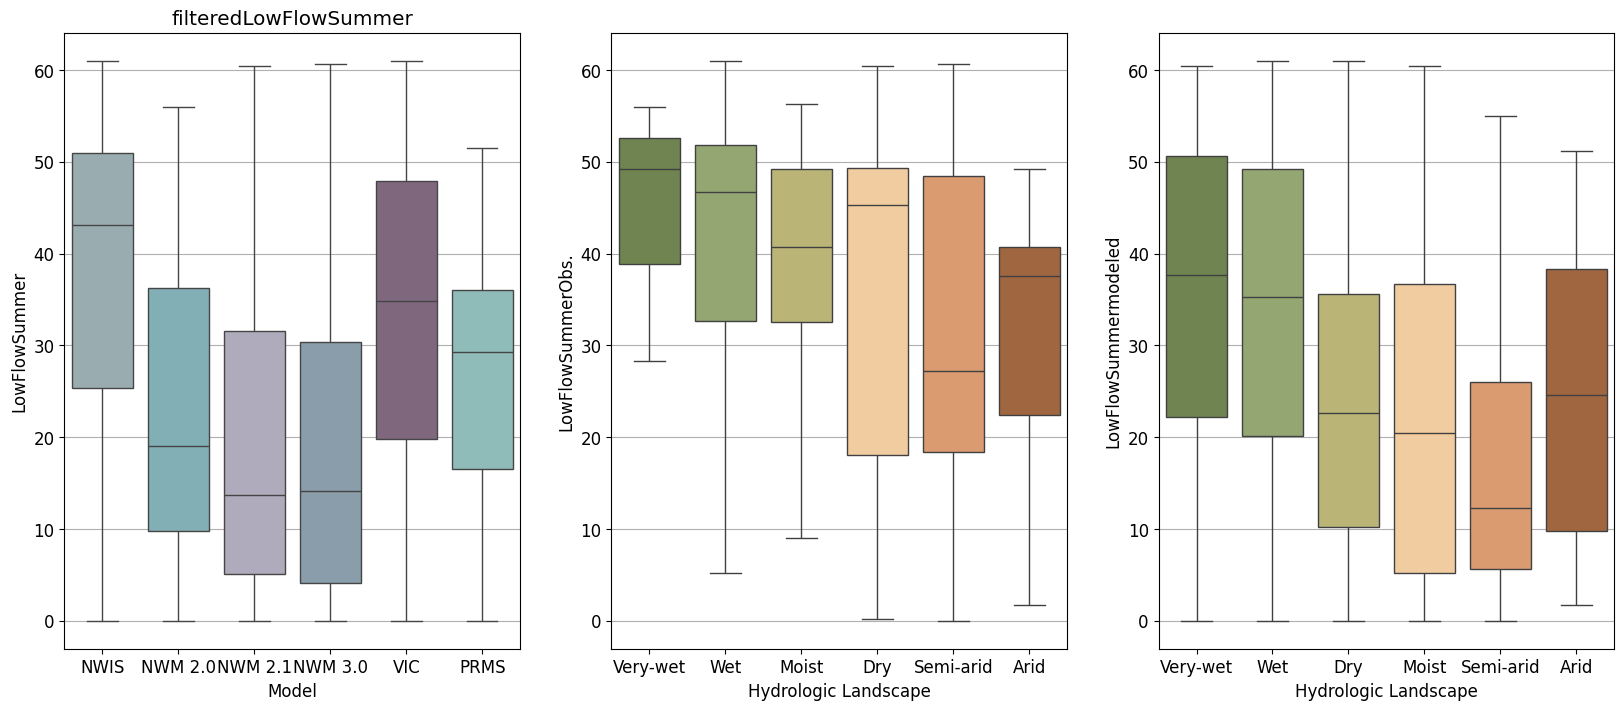

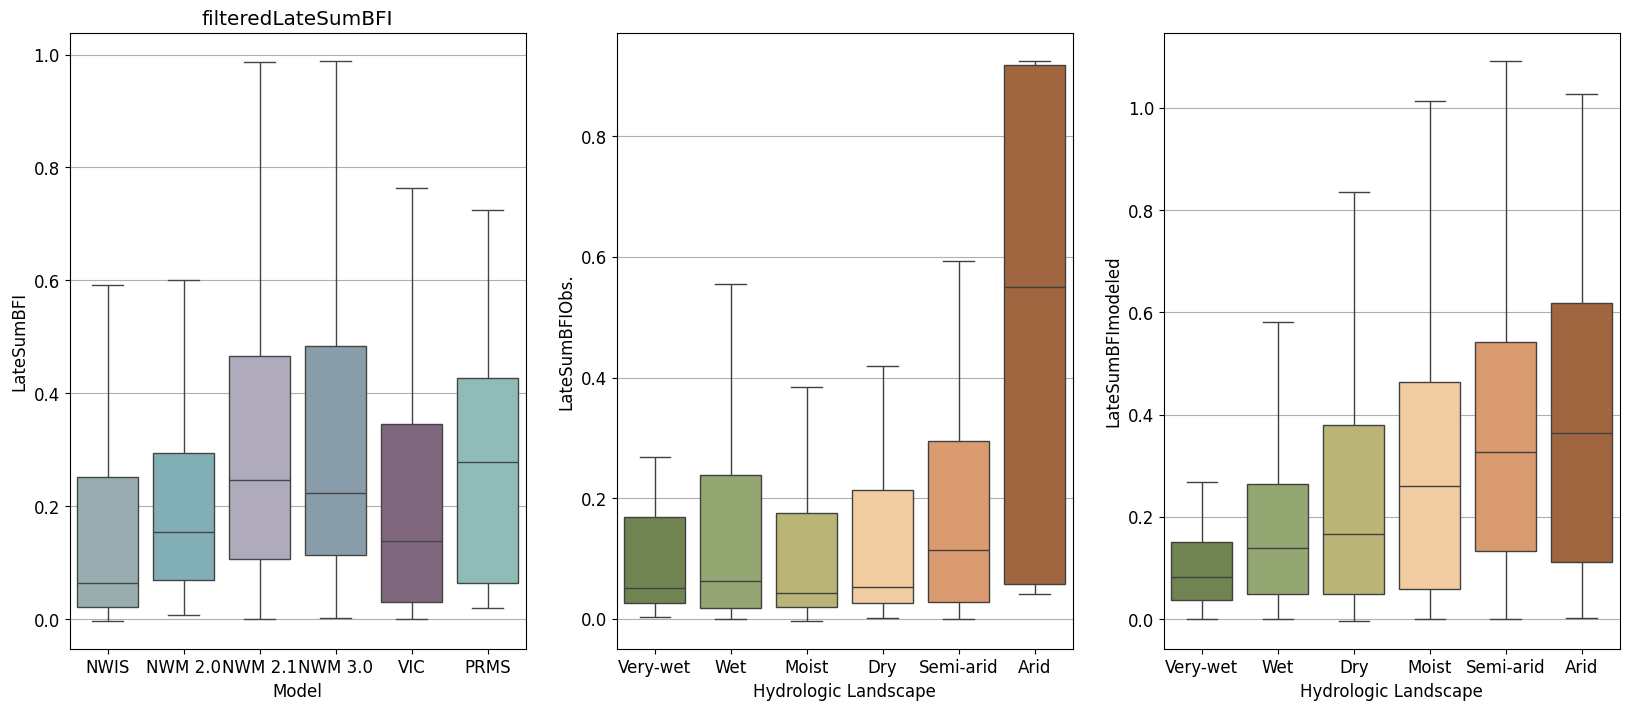

In [12]:
plotMetric('7Q10',"filtered")
plotMetric('7Q2',"filtered")
plotMetric('LowFlow',"filtered")
plotMetric('ZeroFlow',"filtered")
plotMetric('ZeroFlowSummer',"filtered")
plotMetric('LowFlowSummer',"filtered")
plotMetric('LateSumBFI',"filtered")

## Plot all data

In [6]:
output  = pd.read_csv("../data/streamflowStats_NWM3.csv")

In [7]:
df = pd.read_csv("../data/pnwNP_StatsLocations_HydroClass.csv")
df = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.dec_long_va,df.dec_lat_va)).set_crs('epsg:4269')
df = df[["gage","geometry","HydroLandClass"]]
df = pd.concat([df, output], join="outer",axis=1)
df = df.loc[:,~df.columns.duplicated()]

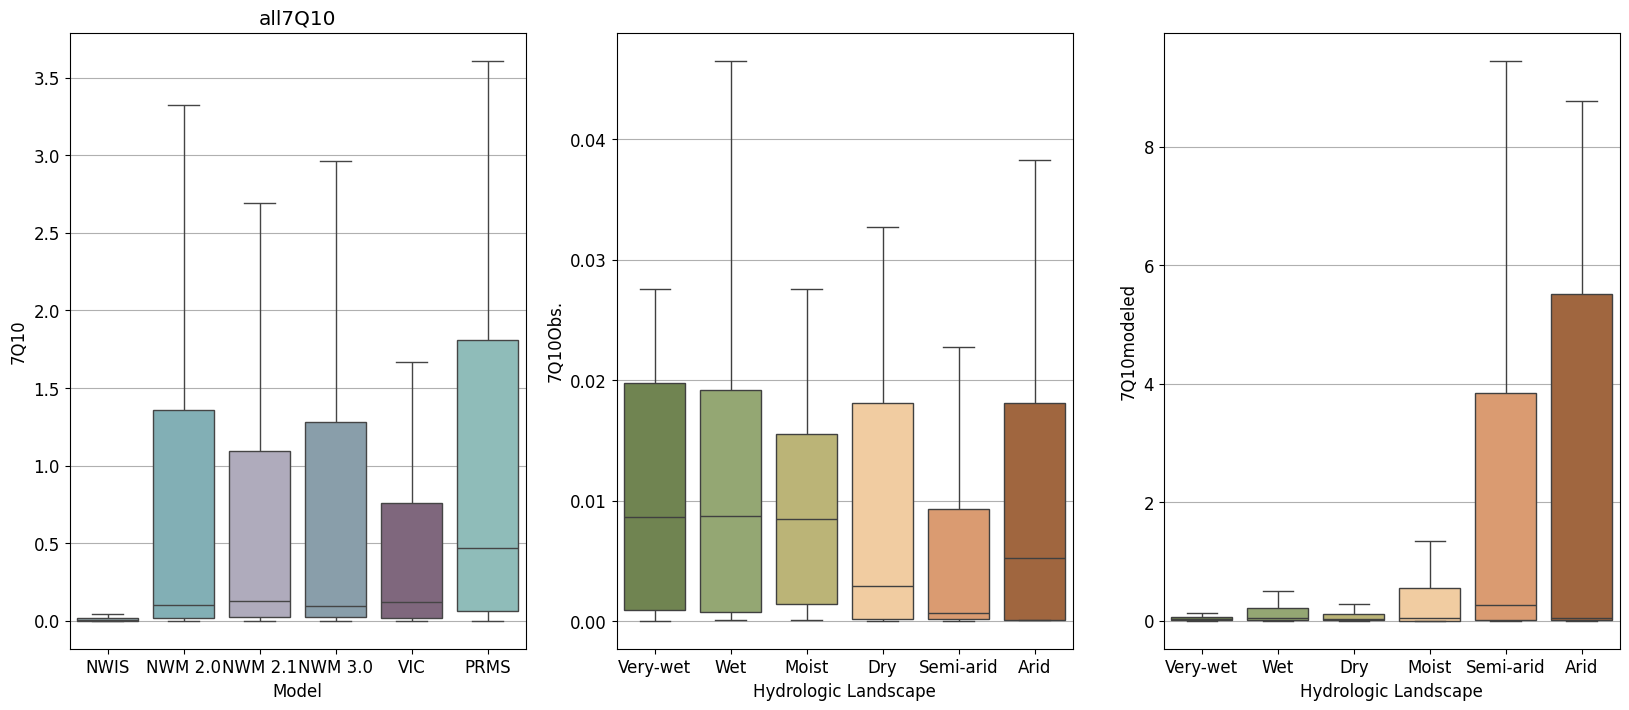

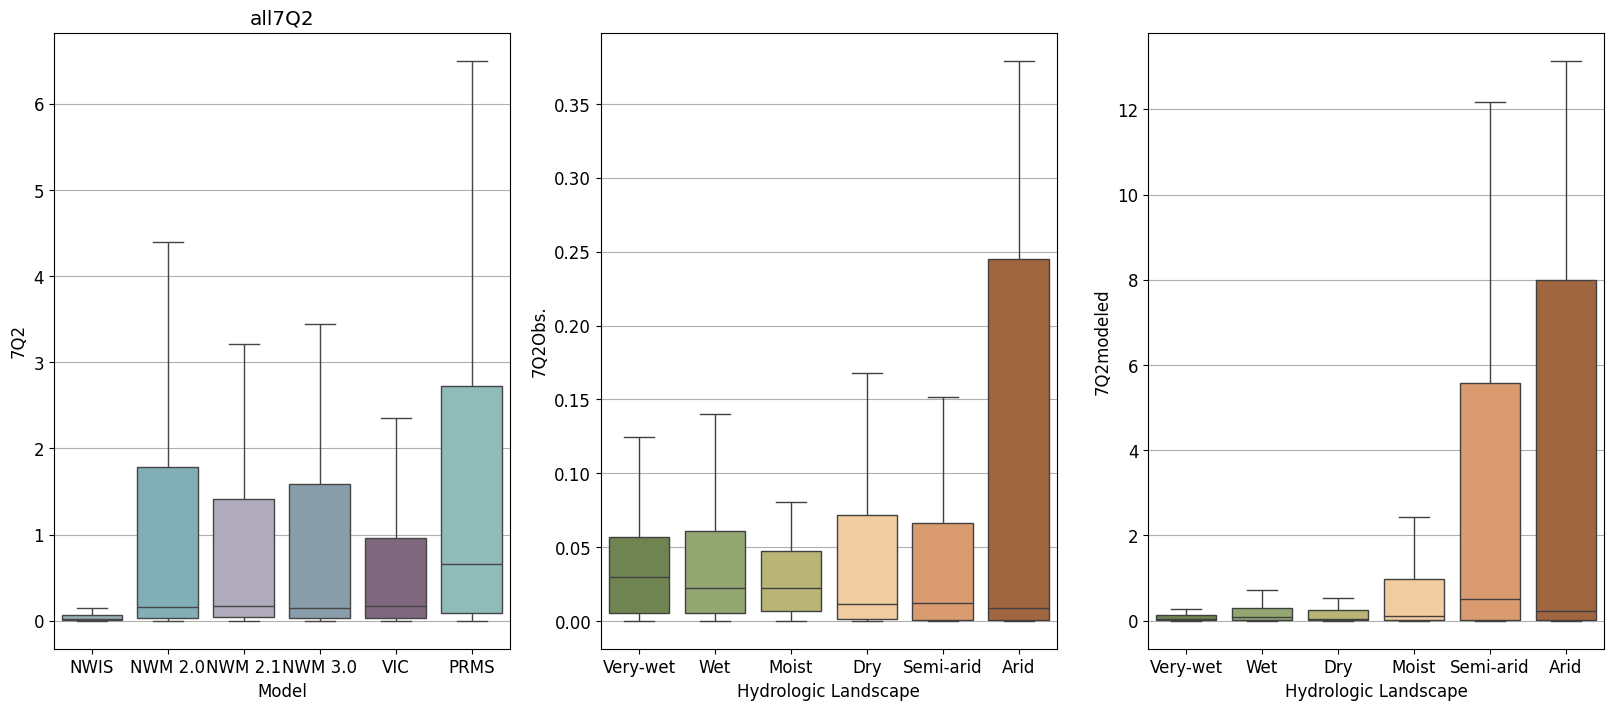

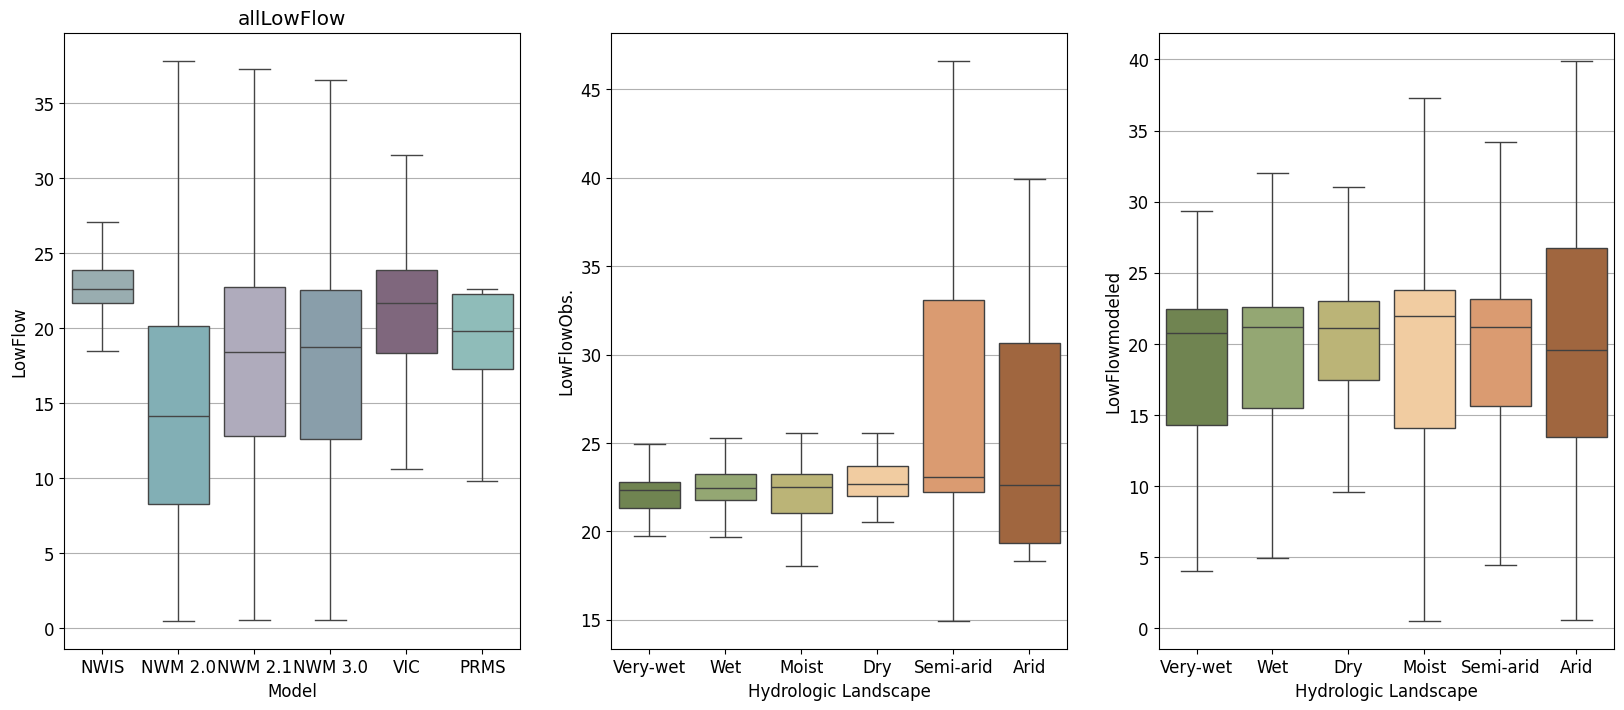

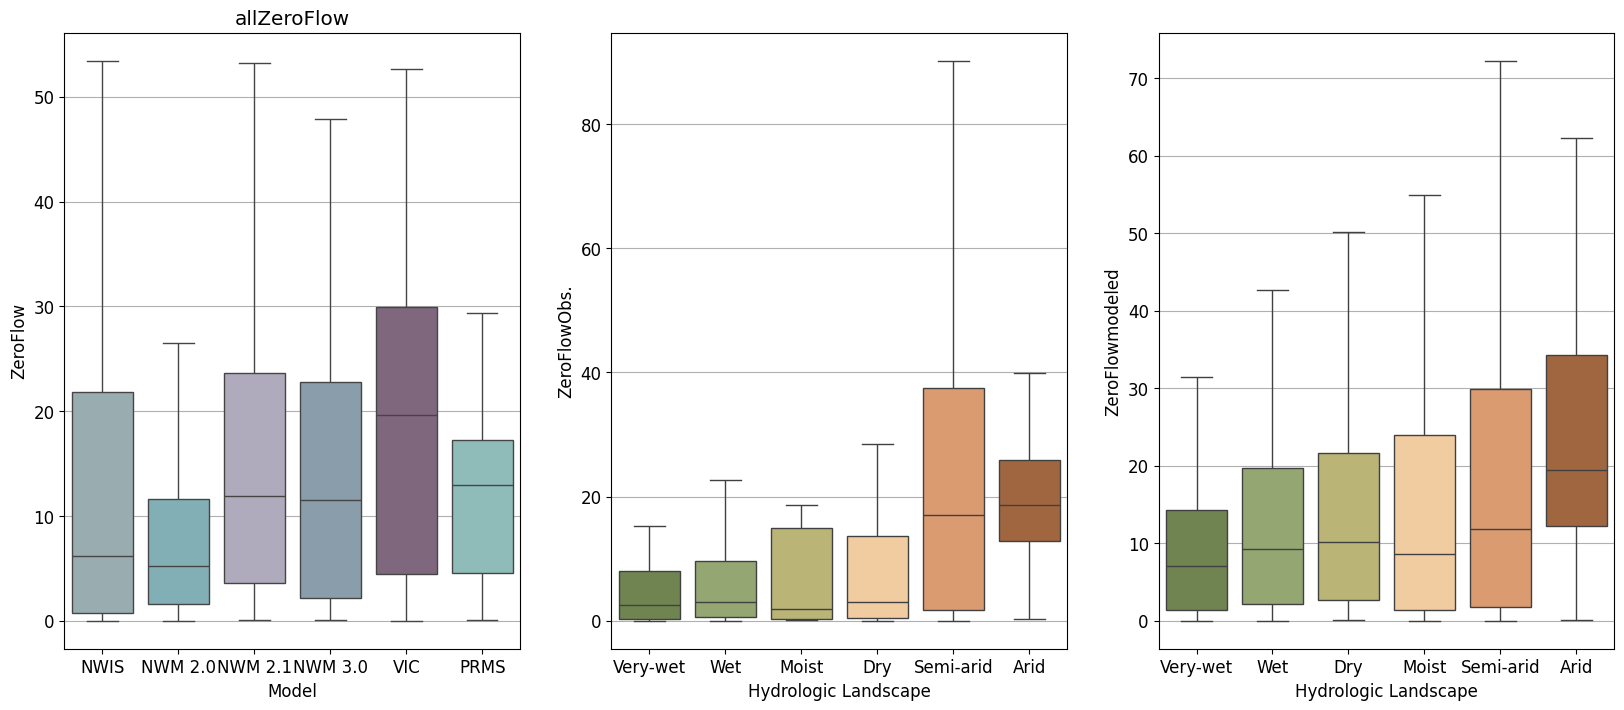

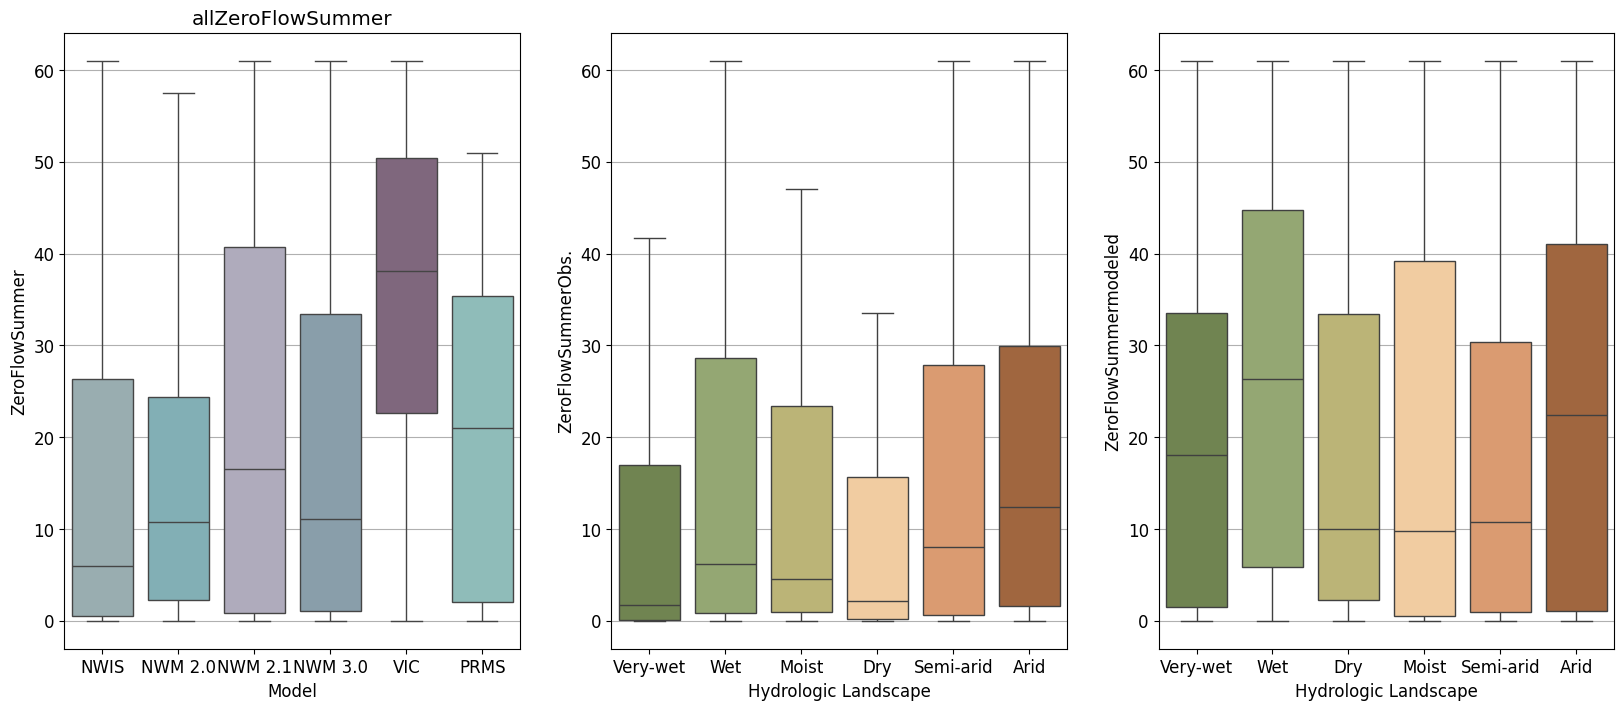

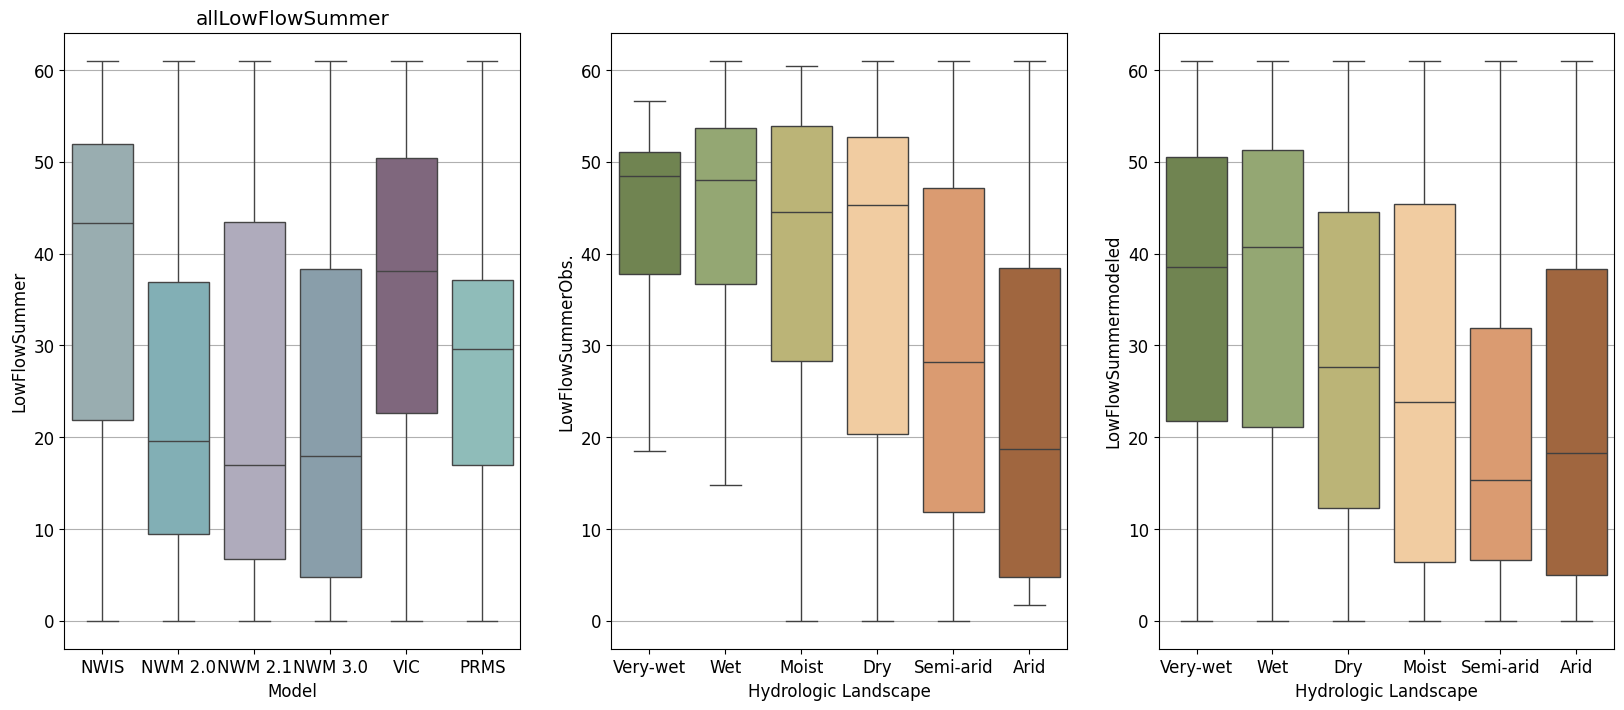

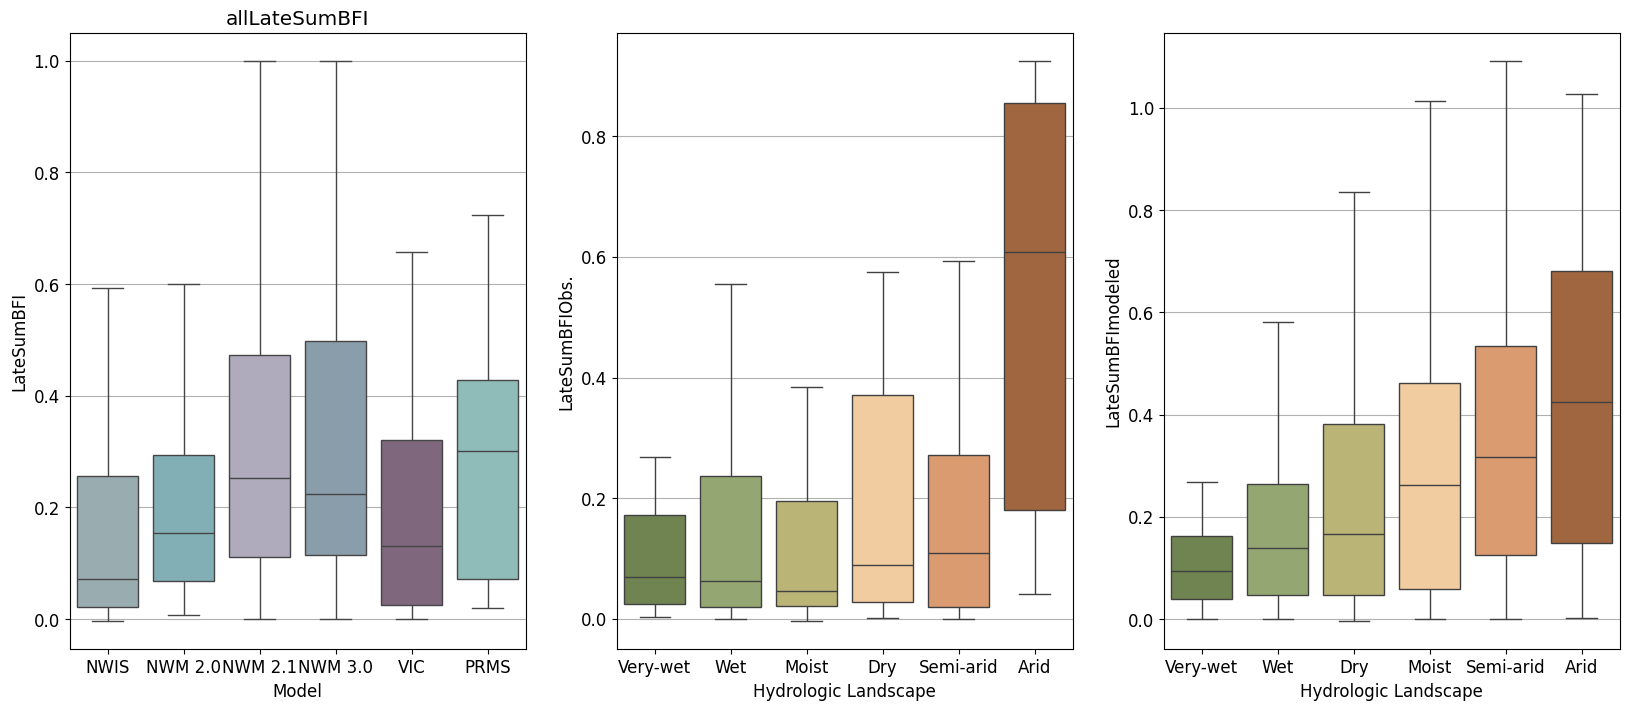

In [9]:
plotMetric('7Q10',"all")
plotMetric('7Q2',"all")
plotMetric('LowFlow',"all")
plotMetric('ZeroFlow',"all")
plotMetric('ZeroFlowSummer',"all")
plotMetric('LowFlowSummer',"all")
plotMetric('LateSumBFI',"all")

## Just plot overlap with KGE

In [13]:
df

,gage,geometry,HydroLandClass,Unnamed: 0,VIC_7Q10,PRMS_7Q10,NWM2d0_7Q10,NWM2d1_7Q10,NWM37Q10,NWIS_7Q10,...,NWM2d0_ZeroFlowSummer,NWM2d1_ZeroFlowSummer,NWM3ZeroFlowSummer,NWIS_ZeroFlowSummer,VIC_LowFlowSummer,PRMS_LowFlowSummer,NWM2d0_LowFlowSummer,NWM2d1_LowFlowSummer,NWM3LowFlowSummer,NWIS_LowFlowSummer
0,10378500,POINT (-119.92328 42.42488),semi_arid,1,1.143568,0.152967,NaN,0.624950,0.050180,0.004209,...,NaN,NaN,1.047619,NaN,24.214286,35.595238,NaN,1.452381,1.738095,50.738095
1,10393500,POINT (-119.17744 43.71515),dry,4,4.145477,0.981530,1.573867,0.726650,0.335530,0.082941,...,0.068182,0.272727,0.159091,NaN,26.727273,29.363636,1.704545,4.022727,4.022727,46.522727
2,10403000,POINT (-119.65941 43.69153),dry,8,1.061097,0.144350,NaN,0.193734,0.081005,0.006300,...,NaN,NaN,NaN,0.517241,20.827586,33.000000,NaN,2.172414,1.310345,47.448276
3,10406500,POINT (-118.45934 42.15545),semi_arid,9,0.080987,0.499374,NaN,0.018050,0.016715,0.031341,...,NaN,11.547619,10.476190,NaN,44.142857,31.119048,NaN,7.380952,2.785714,40.880952
4,12043173,POINT (-124.62635 48.35701),very_wet,15,0.122280,0.043309,NaN,NaN,NaN,0.015450,...,NaN,NaN,NaN,NaN,36.750000,26.500000,NaN,9.000000,11.000000,28.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,14342500,POINT (-122.35669 42.37625),wet,457,0.176597,0.063227,NaN,0.387379,0.446647,0.006738,...,NaN,NaN,NaN,0.125000,50.175000,40.650000,NaN,4.800000,5.350000,5.225000
152,14350000,POINT (-122.60531 42.16375),dry,458,0.355180,0.072775,NaN,0.190810,0.497715,0.000143,...,NaN,NaN,NaN,1.891892,43.891892,38.108108,NaN,5.216216,3.297297,5.351351
153,14353000,POINT (-122.71670 42.14874),moist,459,0.077251,0.025980,0.031380,NaN,0.091127,0.038278,...,11.230769,51.576923,NaN,NaN,32.961538,29.307692,28.461538,48.923077,6.807692,38.000000
154,14362250,POINT (-123.07532 42.15401),moist,460,0.109752,0.025685,0.000075,0.017599,0.001279,0.000084,...,41.263158,3.210526,17.815789,26.552632,37.842105,33.447368,36.894737,21.184211,17.815789,44.894737


In [24]:
stat= "7Q10"
columns = ["NWIS_"+stat,"NWM2d0_"+stat,"NWM2d1_"+stat,"NWM3"+stat,"VIC_"+stat,"PRMS_"+stat,"HydroLandClass"]

tt = df[columns]
    
    
    
##############################################
## Plot 2
##############################################
# my_order = ["very_wet",
#             "wet",
#             "moist",
#             "dry",
#             "semi_arid",
#             "arid"]

# pal = {'very_wet': '#728C48',
#        'wet': '#96B06A',
#        'moist': '#C6BD6C',
#        'dry': '#FFCD93',
#        'semi_arid': '#EC975F' ,
#        'arid': '#B0632F'}

# sns.boxplot(data=tt, 
#              x="NWIS_"+stat, 
#              y=["NWM2d0_"+stat,"NWM2d1_"+stat,"NWM3"+stat,"VIC_"+stat,"PRMS_"+stat]
#              hue="HydroLandClass",
#              showfliers=False,
#              palette = pal,
#             order = my_order)


# ax2.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])
# # ax2.set_ylim(ax2lim)
# ax2.set(ylabel=str(stat)+ "Obs.")
# ax2.set(xlabel="Hydrologic Landscape")
# ax2.grid('on', which='major', axis='y')

In [25]:
tt

,NWIS_7Q10,NWM2d0_7Q10,NWM2d1_7Q10,NWM37Q10,VIC_7Q10,PRMS_7Q10,HydroLandClass
0,0.004209,NaN,0.624950,0.050180,1.143568,0.152967,semi_arid
1,0.082941,1.573867,0.726650,0.335530,4.145477,0.981530,dry
2,0.006300,NaN,0.193734,0.081005,1.061097,0.144350,dry
3,0.031341,NaN,0.018050,0.016715,0.080987,0.499374,semi_arid
4,0.015450,NaN,NaN,NaN,0.122280,0.043309,very_wet
...,...,...,...,...,...,...,...
151,0.006738,NaN,0.387379,0.446647,0.176597,0.063227,wet
152,0.000143,NaN,0.190810,0.497715,0.355180,0.072775,dry
153,0.038278,0.031380,NaN,0.091127,0.077251,0.025980,moist
154,0.000084,0.000075,0.017599,0.001279,0.109752,0.025685,moist


## Archive plots

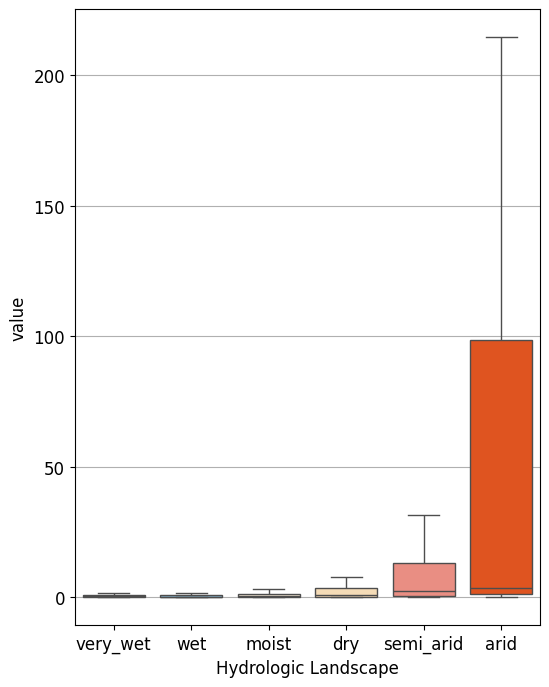

In [16]:
to_plot = df[["NWIS_"+stat,"NWM2d0_"+stat,"NWM2d1_"+stat,"VIC_"+stat,"PRMS_"+stat,'HydroLandClass']].melt(id_vars=['HydroLandClass'])

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))

my_order = ["very_wet",
            "wet",
            "moist",
            "dry",
            "semi_arid",
            "arid"]

pal = {'wet': 'lightskyblue',
          'very_wet': 'dodgerblue' ,
          'dry': 'navajowhite',
          'moist': 'papayawhip',
          'semi_arid': 'salmon' ,
          'arid': 'orangered'}

ax = sns.boxplot(data=to_plot, 
                 x="HydroLandClass", 
                 y="value",
                 hue="HydroLandClass",
                 showfliers=False,
                 palette = pal,
                order = my_order)

# ax.set_xticklabels(["NWIS","NWM 2.1","NWM 2.0","PRMS","VIC"])
# ax.set_ylim([0,35])
# ax.set(ylabel="Baseflow Index [-]")
ax.set(xlabel="Hydrologic Landscape")
ax.grid('on', which='major', axis='y')

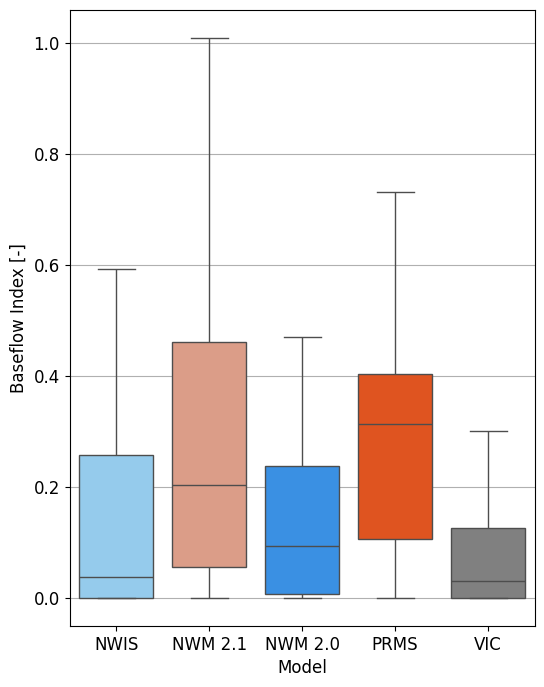

In [31]:
from sklearn.preprocessing import MinMaxScaler

tt = df[['VIC_LateSumBFI', 'PRMS_LateSumBFI','NWM2d0_LateSumBFI', 'NWM2d1_LateSumBFI', 'NWIS_LateSumBFI']].melt()
# tt = tt[tt["value"]<=20]

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))

my_order = ["NWIS_LateSumBFI",
            "NWM2d1_LateSumBFI",
            "NWM2d0_LateSumBFI",
            "PRMS_LateSumBFI",
            "VIC_LateSumBFI"]

ax = sns.boxplot(data=tt, 
                 x="variable", 
                 y="value",
                 hue="variable",
                 showfliers=False,
                 palette = ["grey","orangered", "dodgerblue","darksalmon","lightskyblue"],
                order = my_order)

ax.set_xticklabels(["NWIS","NWM 2.1","NWM 2.0","PRMS","VIC"])
# ax.set_ylim([0,3])
ax.set(ylabel="Baseflow Index [-]")
ax.set(xlabel="Model")
ax.grid('on', which='major', axis='y')

# plt.savefig("../docs/KGE_boxplot.png",dpi=600)

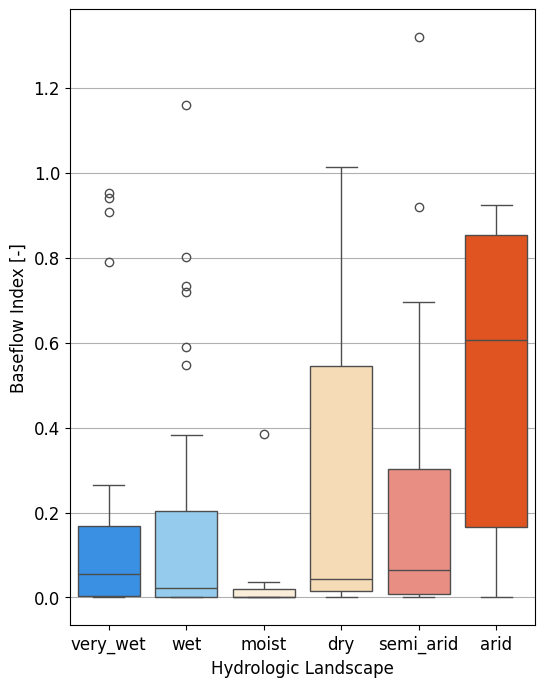

In [34]:
# to_plot = df[['VIC_LateSumBFI', 'PRMS_LateSumBFI','NWM2d0_LateSumBFI', 'NWM2d1_LateSumBFI', 'NWIS_LateSumBFI','HydroLandClass']].melt(id_vars=['HydroLandClass'])
to_plot = df[['NWIS_LateSumBFI','HydroLandClass']].melt(id_vars=['HydroLandClass'])

to_plot

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))

my_order = ["very_wet",
            "wet",
            "moist",
            "dry",
            "semi_arid",
            "arid"]

pal = {'wet': 'lightskyblue',
          'very_wet': 'dodgerblue' ,
          'dry': 'navajowhite',
          'moist': 'papayawhip',
          'semi_arid': 'salmon' ,
          'arid': 'orangered'}

ax = sns.boxplot(data=to_plot, 
                 x="HydroLandClass", 
                 y="value",
                 hue="HydroLandClass",
                 # showfliers=False,
                 palette = pal,
                order = my_order)

# ax.set_xticklabels(["NWIS","NWM 2.1","NWM 2.0","PRMS","VIC"])
# ax.set_ylim([0,1.5])
ax.set(ylabel="Baseflow Index [-]")
ax.set(xlabel="Hydrologic Landscape")
ax.grid('on', which='major', axis='y')

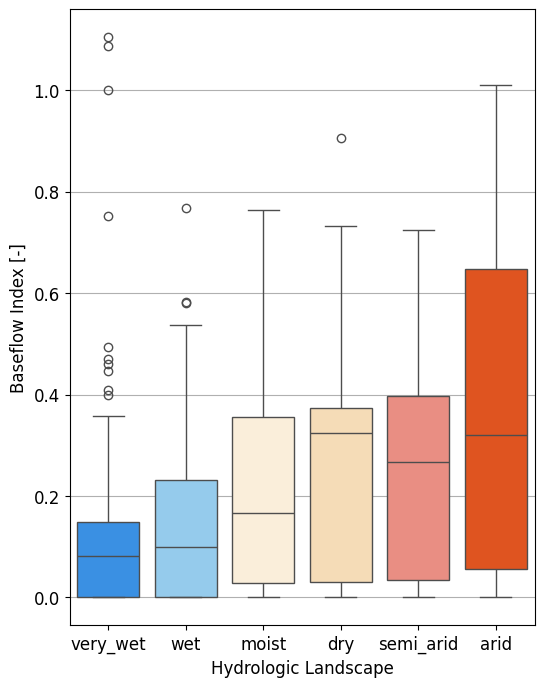

In [35]:
to_plot = df[['VIC_LateSumBFI', 'PRMS_LateSumBFI','NWM2d0_LateSumBFI', 'NWM2d1_LateSumBFI','HydroLandClass']].melt(id_vars=['HydroLandClass'])
# to_plot = df[['NWIS_LateSumBFI','HydroLandClass']].melt(id_vars=['HydroLandClass'])

to_plot

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(6,8))

my_order = ["very_wet",
            "wet",
            "moist",
            "dry",
            "semi_arid",
            "arid"]

pal = {'wet': 'lightskyblue',
          'very_wet': 'dodgerblue' ,
          'dry': 'navajowhite',
          'moist': 'papayawhip',
          'semi_arid': 'salmon' ,
          'arid': 'orangered'}

ax = sns.boxplot(data=to_plot, 
                 x="HydroLandClass", 
                 y="value",
                 hue="HydroLandClass",
                 # showfliers=False,
                 palette = pal,
                order = my_order)

# ax.set_xticklabels(["NWIS","NWM 2.1","NWM 2.0","PRMS","VIC"])
# ax.set_ylim([0,1.5])
ax.set(ylabel="Baseflow Index [-]")
ax.set(xlabel="Hydrologic Landscape")
ax.grid('on', which='major', axis='y')

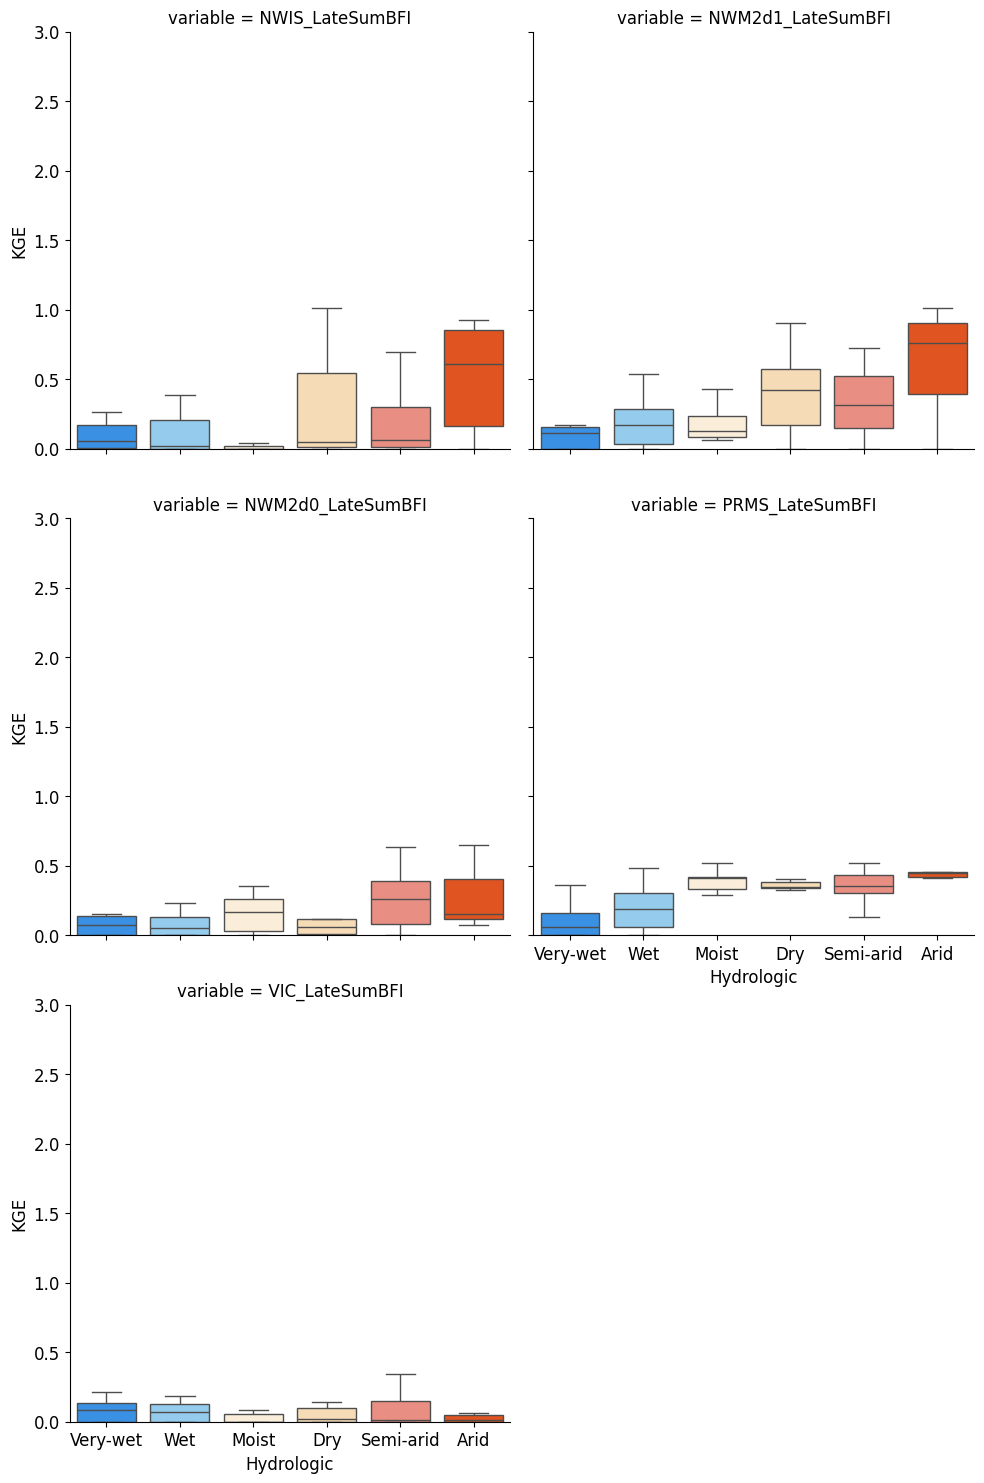

In [36]:
to_plot = df[['VIC_LateSumBFI', 'PRMS_LateSumBFI','NWM2d0_LateSumBFI', 'NWM2d1_LateSumBFI', 'NWIS_LateSumBFI','HydroLandClass']].melt(id_vars=['HydroLandClass'])

my_order = ["very_wet",
            "wet",
            "moist",
            "dry",
            "semi_arid",
            "arid"]

pal = {'wet': 'lightskyblue',
          'very_wet': 'dodgerblue' ,
          'dry': 'navajowhite',
          'moist': 'papayawhip',
          'semi_arid': 'salmon' ,
          'arid': 'orangered'}

g = sns.catplot(
    data=to_plot,
    x='HydroLandClass', 
    y='value',
    col='variable', 
    showfliers=False,
    kind='box', 
    col_wrap=2,
    order= my_order,
    hue = "HydroLandClass", 
    palette=pal,
    col_order=["NWIS_LateSumBFI",
         "NWM2d1_LateSumBFI",
            "NWM2d0_LateSumBFI",
            "PRMS_LateSumBFI",
            "VIC_LateSumBFI"]
)
g.set(ylim = (0,3))
g.map(plt.axhline,y=-0.41, color='black', linestyle='-.',alpha=.5)
g.set_xticklabels(["Very-wet","Wet","Moist","Dry","Semi-arid","Arid"])
g.set(ylabel="KGE")
g.set(xlabel="Hydrologic")


In [ ]:
# mapKGE.plot.scatter(x = "propZero",y="value")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object

pal = {'wet': 'lightskyblue',
          'very_wet': 'dodgerblue' ,
          'dry': 'navajowhite',
          'moist': 'papayawhip',
          'semi_arid': 'salmon' ,
          'arid': 'orangered'}



# pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="HydroLandClass", hue="HydroLandClass", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
# g.map(sns.histplot, "value",
#       bw_adjust=.5, clip_on=False,
#       fill=True, alpha=1, linewidth=1.5)
# g.map(sns.histplot, "value", clip_on=False, color="w", lw=2, bw_adjust=.5)


g.map(sns.histplot, "value", clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
# g.map(sns.histplot, "value", clip_on=False, color="w", lw=2)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


# g.map(label, "KGE value")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


## Scratchy space

In [ ]:
def calcSQ10(df):
    import warnings
    warnings.filterwarnings("ignore")
    '''
    Read in data files for gages and calculate number of late-summer low flow days
    '''
    

    stat = "LateSumQ10Days"
    columns = ["gage","VIC_"+stat,"PRMS_"+stat,"NWM2d0_"+stat,"NWM2d1_"+stat,"NWIS_"+stat]
    out = []

    for column in df[["streamflow_VIC","streamflow_PRMS",'streamflow_NWM2d0','streamflow_NWM2d1','streamflow_NWIS']]:
        
        #### Round columns to add zeros
        if column == "streamflow_NWIS":
            df[column] = np.round(df[column],1)
        else:
            df.loc[df[column]<=(df[column].mean()*.1),"new"] = 0

        ## Calculate number of zero flow days by season
        lsq10d = df[['climate_year','season','new']]
        lsq10d = lsq10d.groupby(['season',"climate_year"]).count()
        lsq10d = lsq10d['new'].mean()
        out.extend([lsq10d])

    out.insert(0,int(df["gage"][0]))
    out = pd.DataFrame(out).transpose()
    out.columns = columns
    return out

In [580]:
i = 56
df,df_nwis = readModelFile(i)
# calc7Q10(df)
df

,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,climate_year,flow_season,season,month,DOY
0,NaN,1914-04-01,NaN,NaN,NaN,11.609907,12116500,1915,NaN,spring,4,91
1,NaN,1914-04-02,NaN,NaN,NaN,11.893076,12116500,1915,NaN,spring,4,92
2,NaN,1914-04-03,NaN,NaN,NaN,12.176244,12116500,1915,NaN,spring,4,93
3,NaN,1914-04-04,NaN,NaN,NaN,14.158423,12116500,1915,NaN,spring,4,94
4,NaN,1914-04-05,NaN,NaN,NaN,18.405950,12116500,1915,NaN,spring,4,95
...,...,...,...,...,...,...,...,...,...,...,...,...
38987,NaN,2020-12-27,NaN,NaN,14.445416,23.134864,12116500,2021,NaN,winter,12,362
38988,NaN,2020-12-28,NaN,NaN,12.486250,23.078230,12116500,2021,NaN,winter,12,363
38989,NaN,2020-12-29,NaN,NaN,11.121666,23.134864,12116500,2021,NaN,winter,12,364
38990,NaN,2020-12-30,NaN,NaN,10.220000,23.616250,12116500,2021,NaN,winter,12,365


In [578]:
i = 56
df,df_nwis = readModelFile(i)
# calc7Q10(df)
df

stat = "LateSumQ10Days"
columns = ["gage","VIC_"+stat,"PRMS_"+stat,"NWM2d0_"+stat,"NWM2d1_"+stat,"NWIS_"+stat]
out = []

for column in df[["streamflow_VIC","streamflow_PRMS",'streamflow_NWM2d0','streamflow_NWM2d1','streamflow_NWIS']]:

    #### Round columns to add zeros
    if column == "streamflow_NWIS":
        df[column] = np.round(df[column],1)
        df.loc[df[column]==0,"new"] = 0
    else:
        df.loc[df[column]<=(df[column].mean()*.1),"new"] = 0

    ## Calculate number of zero flow days by season
    lsq10d = df[['climate_year','season','new']]
    lsq10d = lsq10d.groupby(['season',"climate_year"]).count()
    lsq10d = lsq10d['new'].mean()
    df = df.drop(['new'],axis=1,errors='ignore')
    out.extend([lsq10d])
    
out.insert(0,int(df["gage"][0]))
out = pd.DataFrame(out).transpose()
out.columns = columns

In [579]:
out

,gage,VIC_LateSumQ10Days,PRMS_LateSumQ10Days,NWM2d0_LateSumQ10Days,NWM2d1_LateSumQ10Days,NWIS_LateSumQ10Days
0,12116500.0,4.397196,6.728972,0.806075,1.037383,0.046729


In [556]:
df.loc[df['newTest']==-9999]

,streamflow_VIC,time,streamflow_PRMS,streamflow_NWM2d0,streamflow_NWM2d1,streamflow_NWIS,gage,climate_year,flow_season,season,month,DOY,new,newTest
27996,192.45270,1990-11-24,221.36162,NaN,134.418330,160.6,12116500,1991,NaN,fall,11,328,NaN,-9999.0
33823,165.83311,2006-11-07,329.26947,374.972075,213.951662,47.3,12116500,2007,NaN,fall,11,311,NaN,-9999.0


In [538]:
df[['climate_year','season','new']].groupby(['season',"climate_year"]).count().mean()

new21    1.037383
dtype: float64

In [494]:
output.loc[i]

gage                     1.211650e+07
VIC_7Q10                 5.366806e-01
PRMS_7Q10                4.244919e-01
NWM2d0_7Q10              9.179978e-01
NWM2d1_7Q10              1.020574e+00
NWIS_7Q10                         NaN
VIC_7Q2                  9.269220e-01
PRMS_7Q2                 6.092607e-01
NWM2d0_7Q2               1.477836e+00
NWM2d1_7Q2               1.398767e+00
NWIS_7Q2                          NaN
VIC_LateSumQ10Days       4.439252e+00
PRMS_LateSumQ10Days      7.581776e+00
NWM2d0_LateSumQ10Days    8.184579e+00
NWM2d1_LateSumQ10Days    8.441589e+00
NWIS_LateSumQ10Days      8.441589e+00
VIC_LateSumBFI           2.707916e-01
PRMS_LateSumBFI          2.115012e-01
NWM2d0_LateSumBFI        3.796769e-01
NWM2d1_LateSumBFI        3.778798e-01
NWIS_LateSumBFI          3.139552e-01
Name: 56, dtype: float64

In [499]:
column = "streamflow_NWIS"
#### Round columns to add zeros
if column == "streamflow_NWIS":
    df[column] = np.round(df[column],1)
else:
    df.loc[df[column]<=(df[column].mean()*.1),"new"] = 0

## Calculate number of zero flow days by season
lsq10d = df[['climate_year','season','new']]
lsq10d = lsq10d.groupby(['season',"climate_year"]).count()
# lsq10d = lsq10d['new'].mean()
# out.extend([lsq10d])

In [506]:
lsq10d.describe()

,new
count,428.000000
mean,8.544393
std,15.626207
min,0.000000
25%,0.000000
50%,0.000000
75%,11.000000
max,85.000000


In [509]:
column = "streamflow_NWM2d1"
#### Round columns to add zeros
if column == "streamflow_NWIS":
    df[column] = np.round(df[column],1)
else:
    # df.loc[df[column]<=(df[column].mean()*.1),"new"] = 0
    pass

## Calculate number of zero flow days by season
lsq10d = df[['climate_year','season','new']]
lsq10d = lsq10d.groupby(['season',"climate_year"]).count()
# lsq10d = lsq10d['new'].mean()
# out.extend([lsq10d])

In [510]:
lsq10d.describe()

,new
count,428.000000
mean,8.544393
std,15.626207
min,0.000000
25%,0.000000
50%,0.000000
75%,11.000000
max,85.000000
